In [1]:
import pandas as pd
import geopandas as gpd
from dbfread import DBF
import os
import openmatrix as omx
pd.options.display.float_format = '{:,.2f}'.format
zWFRCMax = 2216

In [2]:
efa_file = r'A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\ModeShare\_lookup_taz_efa.dbf'
efa_dbf = pd.DataFrame(DBF(efa_file,load=True))
efa_list = efa_dbf['TAZID'].tolist()
print(efa_list)

[52, 53, 67, 68, 69, 645, 646, 653, 654, 658, 659, 660, 661, 663, 664, 678, 684, 685, 688, 694, 700, 702, 703, 710, 719, 720, 729, 736, 737, 840, 880, 951, 952, 960, 961, 962, 966, 967, 968, 969, 970, 972, 980, 981, 982, 984, 985, 986, 987, 988, 989, 995, 1007, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1039, 1042, 1044, 1046, 1048, 1050, 1051, 1052, 1060, 1061, 1062, 1063, 1064, 1067, 1070, 1073, 1091, 1093, 1094, 1096, 1098, 1099, 1100, 1101, 1108, 1109, 1110, 1111, 1112, 1113, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1160, 1161, 1163, 1164, 1166, 1167, 1168, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1204, 1217, 1218, 1219, 1220, 1221, 1223, 1226, 1227, 1228, 1229, 1230, 1231, 1248, 1258, 1260, 1263, 1276, 1282, 1294, 1299, 1304, 1305, 1307, 1309, 1311, 1312, 1314, 1319, 1320, 1331, 1338, 1340, 1341, 1342, 1345, 1347, 1348, 1349, 1350, 1353, 

In [3]:
_pmskm_filename = r"A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\PMSkims\NoBuild_2050_SkmPM.omx"
_amskm_filename = r"A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\PMSkims\NoBuild_2050_SkmAM.omx"

dImportTabs = ['GP_TotTime']

print(_pmskm_filename)

myMatrixAM = omx.open_file(_amskm_filename)
myMatrixPM = omx.open_file(_pmskm_filename)

nMatrices = len(myMatrixAM)
nZones =  myMatrixAM.shape()[0] # always same number of i and j zones
matNames = myMatrixAM.list_matrices()

dictionary_list = []

#read and print all data
for m in range(nMatrices):
    if matNames[m] in dImportTabs:
        print("Matrix: %s" %matNames[m])
        _mAM = myMatrixAM[matNames[m]]
        _mPM = myMatrixPM[matNames[m]]
        for r in range(nZones):
            if r % 100==0:
                print (r)
            for c in range (nZones):
                if r < zWFRCMax or c < zWFRCMax:
                    if r in efa_list or c in efa_list:
                        if _mPM[r,c] > 0:
                            dictionary_data = { 'tablPMPk' : matNames[m] ,
                                                'oTAZ'     : r+1         , # TAZ ID is one more than index
                                                'dTAZ'     : c+1         ,                
                                                'valueAMPk': _mAM[r,c]   ,  # get maximum value in row from AM matrix
                                                'valuePMPk': _mPM[r,c]      # get maximum value in row from PM matrix
                                               }
                            dictionary_list.append(dictionary_data)

dfTime = pd.DataFrame.from_dict(dictionary_list)
dictionary_list = []
dfTime

A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\PMSkims\NoBuild_2050_SkmPM.omx
Matrix: GP_TotTime
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


,tablPMPk,oTAZ,dTAZ,valueAMPk,valuePMPk
0,GP_TotTime,1,53,13.63,13.66
1,GP_TotTime,1,54,13.21,13.24
2,GP_TotTime,1,68,14.73,14.80
3,GP_TotTime,1,69,13.46,13.51
4,GP_TotTime,1,70,14.63,14.70
...,...,...,...,...,...
3239999,GP_TotTime,3629,2028,77.11,82.40
3240000,GP_TotTime,3629,2030,78.91,86.92
3240001,GP_TotTime,3629,2097,70.05,71.21
3240002,GP_TotTime,3629,2098,70.08,71.26


In [4]:
_hbwtrip_filename = r"A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\PMSkims\NoBuild_2050_HBW_trips_allsegs_Pk.omx"

dImportTabs = ['auto']

print(_hbwtrip_filename)

myMatrix = omx.open_file(_hbwtrip_filename)

nMatrices = len(myMatrix)
nZones =  myMatrix.shape()[0] # always same number of i and j zones
matNames = myMatrix.list_matrices()

dictionary_list_2 = []

#read and print all data
for m in range(nMatrices):
    if matNames[m] in dImportTabs:
        print("Matrix: %s" %matNames[m])
        _m = myMatrix[matNames[m]]
        for r in range(nZones):
            if r % 100==0:
                print (r)
            for c in range (nZones):
                if r < zWFRCMax or c < zWFRCMax:
                    if r in efa_list or c in efa_list:
                        if _m[r,c] > 0:
                            dictionary_data = { 'tabHBW'  : matNames[m] ,
                                                'oTAZ'    : r+1         , # TAZ ID is one more than index
                                                'dTAZ'    : c+1         ,                
                                                'valueHBW': _m[r,c]  # get maximum value in row
                                            }
                            dictionary_list_2.append(dictionary_data)
                    
dfHBWTrips = pd.DataFrame.from_dict(dictionary_list_2)
dictionary_list_2 = []
dfHBWTrips

A:\1 - TDM\3 - Model Dev\1 - WF\2 - Sandbox\v9.0Beta\WF TDM v9.0 - 2023-04-28\Scenarios\_PerformanceMeasures\PMSkims\NoBuild_2050_HBW_trips_allsegs_Pk.omx
Matrix: auto
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


,tabHBW,oTAZ,dTAZ,valueHBW
0,auto,2,53,192.00
1,auto,2,54,115.00
2,auto,2,68,4.00
3,auto,2,69,14.00
4,auto,2,70,4.00
...,...,...,...,...
1351103,auto,3629,2028,2.00
1351104,auto,3629,2030,3.00
1351105,auto,3629,2097,3.00
1351106,auto,3629,2098,2.00


In [5]:
dfCombo = pd.DataFrame.merge(dfTime,dfHBWTrips,on=('oTAZ','dTAZ'))
#dfCombo = dfCombo[dfCombo['valuePMPk']<valuePMPk]
dfCombo

,tablPMPk,oTAZ,dTAZ,valueAMPk,valuePMPk,tabHBW,valueHBW
0,GP_TotTime,2,53,13.08,13.10,auto,192.00
1,GP_TotTime,2,54,12.65,12.68,auto,115.00
2,GP_TotTime,2,68,14.17,14.24,auto,4.00
3,GP_TotTime,2,69,12.90,12.96,auto,14.00
4,GP_TotTime,2,70,14.07,14.14,auto,4.00
...,...,...,...,...,...,...,...
1351103,GP_TotTime,3629,2028,77.11,82.40,auto,2.00
1351104,GP_TotTime,3629,2030,78.91,86.92,auto,3.00
1351105,GP_TotTime,3629,2097,70.05,71.21,auto,3.00
1351106,GP_TotTime,3629,2098,70.08,71.26,auto,2.00


In [6]:
dfCombo['AMPk_PMPk_x_HBW'] = (dfCombo['valueAMPk'] + dfCombo['valuePMPk'] ) * dfCombo['valueHBW']
dfCombo

,tablPMPk,oTAZ,dTAZ,valueAMPk,valuePMPk,tabHBW,valueHBW,AMPk_PMPk_x_HBW
0,GP_TotTime,2,53,13.08,13.10,auto,192.00,"5,026.56"
1,GP_TotTime,2,54,12.65,12.68,auto,115.00,"2,912.95"
2,GP_TotTime,2,68,14.17,14.24,auto,4.00,113.64
3,GP_TotTime,2,69,12.90,12.96,auto,14.00,362.04
4,GP_TotTime,2,70,14.07,14.14,auto,4.00,112.84
...,...,...,...,...,...,...,...,...
1351103,GP_TotTime,3629,2028,77.11,82.40,auto,2.00,319.02
1351104,GP_TotTime,3629,2030,78.91,86.92,auto,3.00,497.49
1351105,GP_TotTime,3629,2097,70.05,71.21,auto,3.00,423.78
1351106,GP_TotTime,3629,2098,70.08,71.26,auto,2.00,282.68


In [7]:
# round to two decimal places in python pandas
dWFRCTotals = dfCombo[['valueHBW','AMPk_PMPk_x_HBW']].sum()
dWFRCTotals

valueHBW             38,945,243.98
AMPk_PMPk_x_HBW   2,055,640,700.41
dtype: float64

In [8]:
dWFRCTotals[1] / dWFRCTotals[0] 

52.78284304656446

array([[<AxesSubplot:title={'center':'oTAZ'}>,
        <AxesSubplot:title={'center':'dTAZ'}>],
       [<AxesSubplot:title={'center':'valueAMPk'}>,
        <AxesSubplot:title={'center':'valuePMPk'}>]], dtype=object)

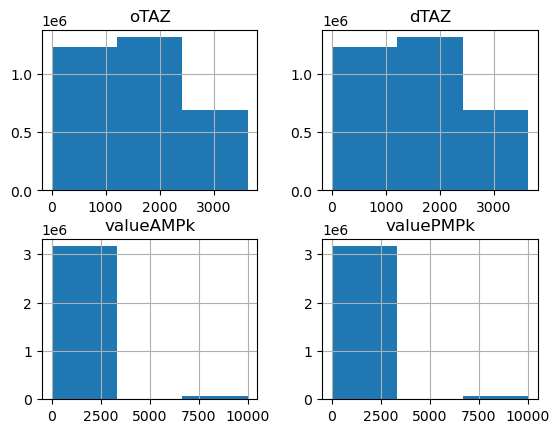

In [9]:
dfTime.hist(bins=3)
